<h1><center> Project - Random Forest Algorithm </center> </h1>
<h2><center> COMPSCI X415.2 Intro to Data Science </center> </h2>
<h2><center> UC Berkeley - Extension</center> </h2>
<h3><center>     Prashant Chopalli </center> </h3>


## Introduction
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

### Research Questions ###
+ Able to predict that a mushromm variety is poisnous or not

<h3>    Data Source  </h3>
Attribute Information: 

+ cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
+ cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
+ cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

+ bruises: bruises=t,no=f

+ odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

+ gill-attachment: attached=a,descending=d,free=f,notched=n

+ gill-spacing: close=c,crowded=w,distant=d

+ gill-size: broad=b,narrow=n

+ gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

+ stalk-shape: enlarging=e,tapering=t

+ stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

+ stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

+ stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

+ stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

+ stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

+ veil-type: partial=p,universal=u

+ veil-color: brown=n,orange=o,white=w,yellow=y

+ ring-number: none=n,one=o,two=t

+ ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

+ spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

+ population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

+ habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

Target variable:
+ Classes: edible=e, poisonous=p


<p> <a href="https://archive.ics.uci.edu/ml/datasets/Mushroom">Original Data Source from UCI Repository. </a></p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

<AxesSubplot:xlabel='gill-color', ylabel='Count'>

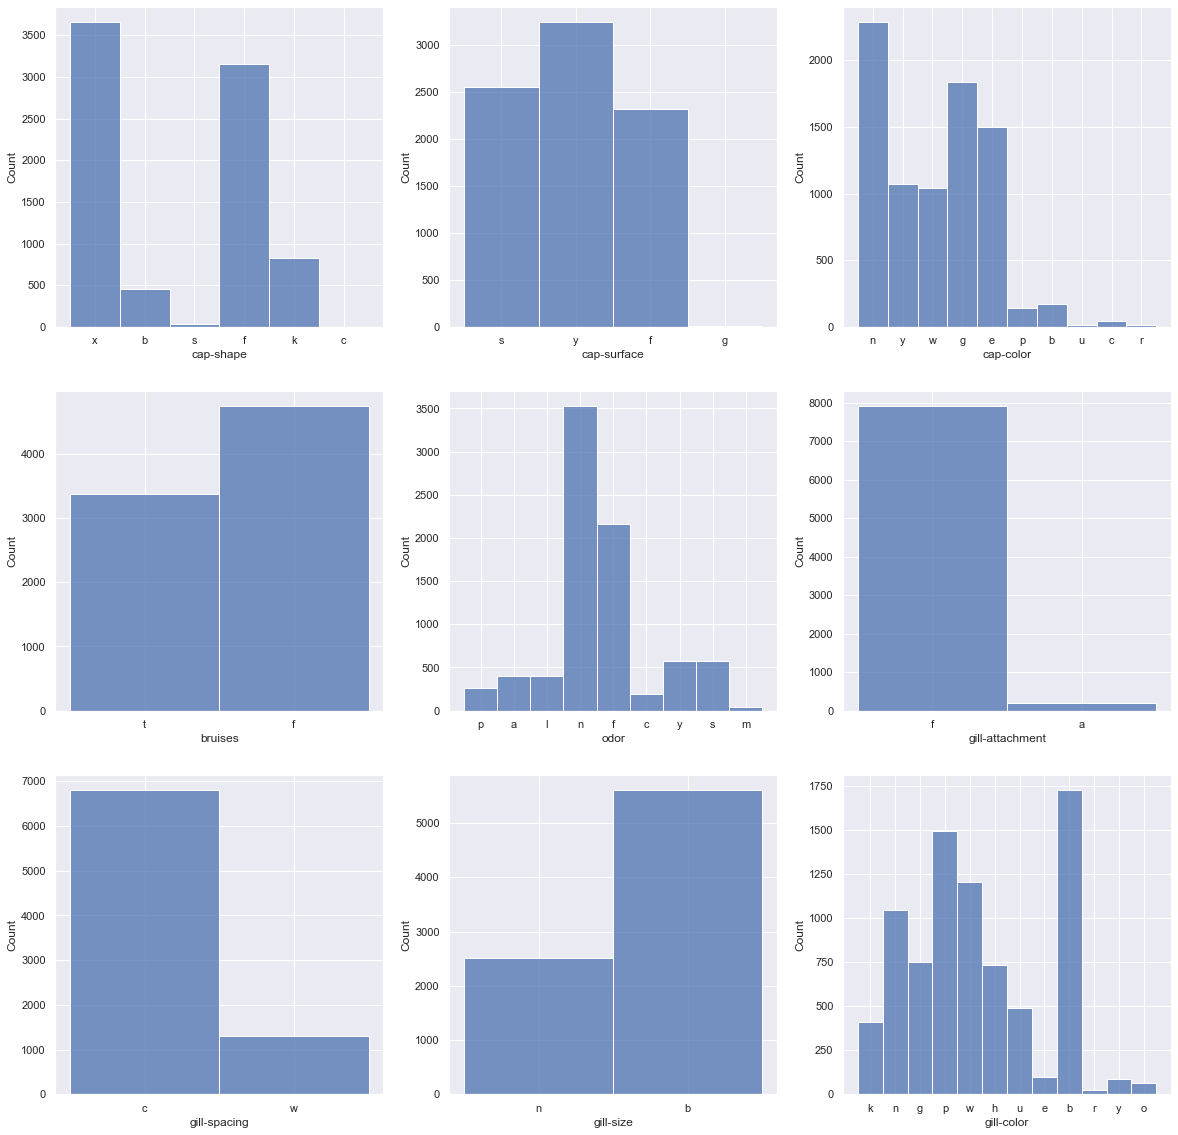

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# fig=plt.figure(figsize=(20,20))
fig,axs=plt.subplots(3,3,figsize=(20,20))
sns.histplot(df['cap-shape'],ax=axs[0,0])
sns.histplot(df['cap-surface'],ax=axs[0,1])
sns.histplot(df['cap-color'],ax=axs[0,2])
sns.histplot(df['bruises'],ax=axs[1,0])
sns.histplot(df['odor'],ax=axs[1,1])
sns.histplot(df['gill-attachment'],ax=axs[1,2])
sns.histplot(df['gill-spacing'],ax=axs[2,0])
sns.histplot(df['gill-size'],ax=axs[2,1])
sns.histplot(df['gill-color'],ax=axs[2,2])


In [8]:
cat_features=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
cat_pipeline=Pipeline(steps=[('hot',OneHotEncoder())])
full_pipeline=ColumnTransformer(transformers=[('cat',cat_pipeline,cat_features)])

In [10]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
x=df.drop(['class'],axis=1)
y=df['class']

In [12]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# for f in x.columns:
#     label=LabelEncoder()
#     x[f]=label.fit_transform(x[f])
#     x[f].unique()


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [14]:
# dx=DecisionTreeClassifier(max_depth=2)
# dx.fit(x_train,y_train)
# # x_test_prep=full_pipeline.transform(x_test)
# y_pred=dx.predict(x_test)

In [15]:
x_train_prep=full_pipeline.fit_transform(x_train)

In [16]:
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train_prep,y_train)
x_test_prep=full_pipeline.transform(x_test)
y_pred=dtree.predict(x_test_prep)


In [17]:
print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.9575384615384616


In [18]:
forest=RandomForestClassifier(n_estimators=200,max_leaf_nodes=10,n_jobs=-1,max_features="sqrt",oob_score=True,max_samples=0.7)
forest.fit(x_train_prep,y_train)
x_test_prep=full_pipeline.transform(x_test)
y_pred_fr=forest.predict(x_test_prep)
print("accuracy",accuracy_score(y_test,y_pred_fr))

accuracy 0.9907692307692307


In [19]:
forest.oob_score_

0.988767502692722

In [20]:
xlist=forest.feature_importances_
xlist

array([5.39878240e-04, 3.67449916e-05, 3.27325810e-04, 4.84605929e-05,
       1.16416981e-04, 4.31621889e-05, 2.69456223e-03, 0.00000000e+00,
       3.88076776e-03, 1.11568568e-03, 1.98534665e-03, 2.11941308e-04,
       3.89800392e-04, 8.42490640e-04, 3.39538202e-04, 1.32203924e-03,
       8.21041938e-05, 1.48318880e-04, 7.81121645e-04, 2.94706355e-03,
       1.78507835e-02, 3.08141072e-02, 5.12754749e-03, 8.71260131e-03,
       9.07653941e-02, 6.42105118e-03, 7.46863999e-04, 1.44358666e-01,
       1.34671586e-02, 6.66022517e-03, 3.67946110e-03, 9.63042913e-04,
       8.25586461e-05, 1.67032655e-02, 1.73254328e-02, 7.26100768e-02,
       4.35166408e-02, 4.54104200e-02, 9.83104853e-06, 9.24825484e-04,
       1.26672108e-03, 1.01232102e-05, 2.03341919e-03, 0.00000000e+00,
       1.35519508e-04, 5.75828850e-04, 4.29372843e-04, 2.72361813e-03,
       0.00000000e+00, 1.16393123e-02, 8.67005331e-03, 8.04155638e-03,
       1.32413369e-02, 6.53063477e-03, 1.71264692e-02, 1.28077641e-03,
      

In [21]:
# feature_names = [f"feature {i}" for i in range(x_train_prep.shape[1])]
# forest_imp=pd.Series(xlist,index=feature_names)
# forest_imp.plot.bar()

In [22]:
adb=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm='SAMME.R',n_estimators=20,learning_rate=0.05,random_state=2)
adb.fit(x_train_prep,y_train)
x_test_prep=full_pipeline.transform(x_test)
y_pred_adb=adb.predict(x_test_prep)
print("accuracy",accuracy_score(y_test,y_pred_adb))

accuracy 0.9704615384615385


In [23]:
adb.n_classes_

2

In [24]:
gdb=GradientBoostingClassifier(n_estimators=20,learning_rate=0.05,max_depth=2,random_state=2)
gdb.fit(x_train_prep,y_train)
x_test_prep=full_pipeline.transform(x_test)
y_pred_gdb=adb.predict(x_test_prep)
print("accuracy",accuracy_score(y_test,y_pred_gdb))


accuracy 0.9704615384615385
